# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Monthly Shampoo Sales 

Sofia Velasquez 22049

José Marchena 22398


### 0. Obtencion de datos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

shampoo_sales = pd.read_csv(
    './data/shampoo.csv', 
)

## Estos datos tienen un formato aambiguo "1-01"
# Se deduce que el segundo numero refiere a mes (debido a que solo avanza de 1 a 12)
# El primero es poco probable que refiera a dia, asi que probablemente refiere a año
# Se tomara que una entrada como "2-04" refiere a una fecha como 2002-04

## Agregar año para evitar problemas de parseo
shampoo_sales[["Y","M"] ] = shampoo_sales["Month"].str.split('-', expand=True).astype(int)
shampoo_sales.index = pd.to_datetime({    
    'year': shampoo_sales['Y'] + 2000,
    'month': shampoo_sales['M'],
    'day': 1})
shampoo_sales.pop("Y")
shampoo_sales.pop("M")
shampoo_sales.pop("Month")
print(shampoo_sales)


            Sales
2001-01-01  266.0
2001-02-01  145.9
2001-03-01  183.1
2001-04-01  119.3
2001-05-01  180.3
2001-06-01  168.5
2001-07-01  231.8
2001-08-01  224.5
2001-09-01  192.8
2001-10-01  122.9
2001-11-01  336.5
2001-12-01  185.9
2002-01-01  194.3
2002-02-01  149.5
2002-03-01  210.1
2002-04-01  273.3
2002-05-01  191.4
2002-06-01  287.0
2002-07-01  226.0
2002-08-01  303.6
2002-09-01  289.9
2002-10-01  421.6
2002-11-01  264.5
2002-12-01  342.3
2003-01-01  339.7
2003-02-01  440.4
2003-03-01  315.9
2003-04-01  439.3
2003-05-01  401.3
2003-06-01  437.4
2003-07-01  575.5
2003-08-01  407.6
2003-09-01  682.0
2003-10-01  475.3
2003-11-01  581.3
2003-12-01  646.9


In [2]:
## Ya podemos proceder con la extrapolacion
division = int(len(shampoo_sales)*0.7)
train_shampoo_sales = shampoo_sales[:division]
test_shampoo_sales = shampoo_sales[division:]

print(shampoo_sales.shape)
print(train_shampoo_sales.shape)
print(test_shampoo_sales.shape)

(36, 1)
(25, 1)
(11, 1)


In [3]:
%load_ext autoreload
%autoreload 2
import scripts

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Analisis Exploratorio

Description
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000
Time Series


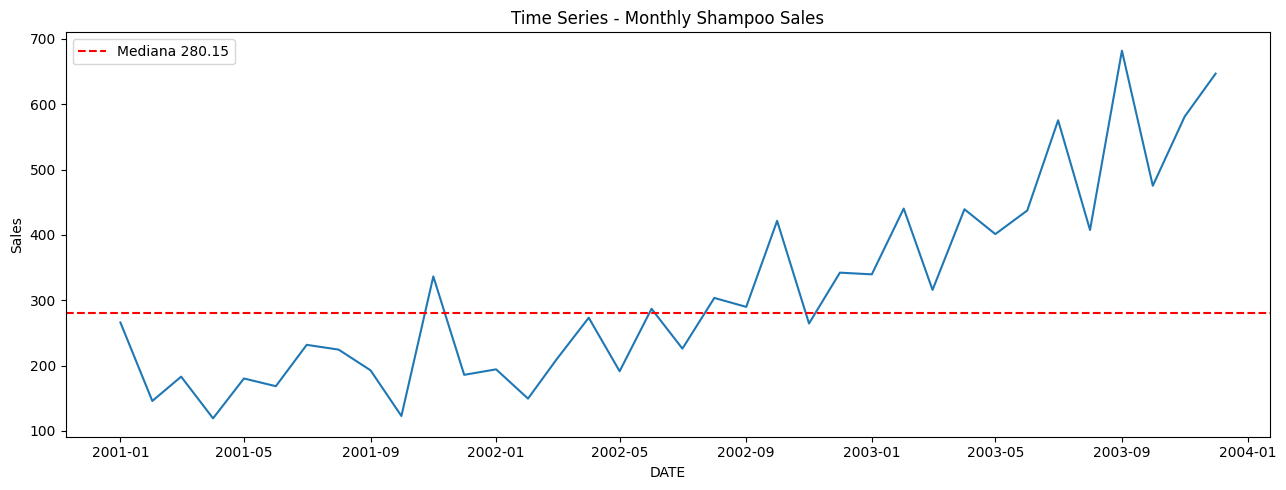

Seasonal Decompose
Resultados del Test de Dickey Fuller
Estadístico de prueba         3.060142
p-value                       1.000000
# de retardos usados         10.000000
# de observaciones usadas    25.000000
Critical Value (1%)          -3.723863
Critical Value (5%)          -2.986489
Critical Value (10%)         -2.632800
dtype: float64
NO se rechaza Hipotesis Nula => data NO es estacionaria en media
ACF plot


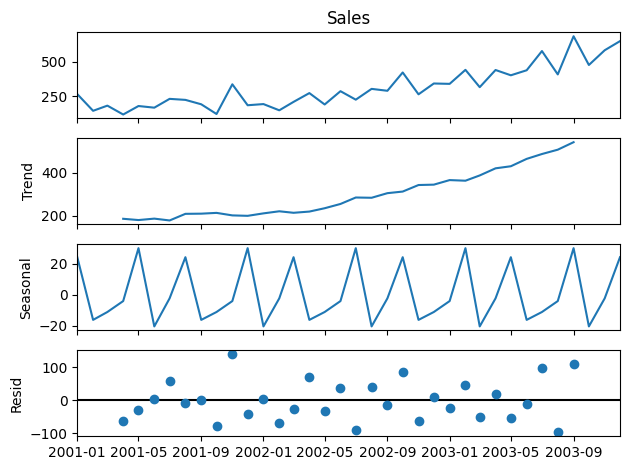

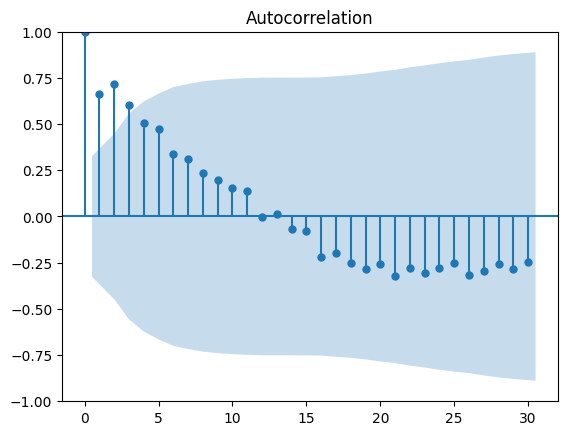

In [4]:
value = "Sales"
title = "Monthly Shampoo Sales"

scripts.exploratory_analysis(
    shampoo_sales,
    value,
    title
)

### 2. Moving Average

Finding Best Periodsss
Best Lag is 1 with weight of 0.7165448001890208


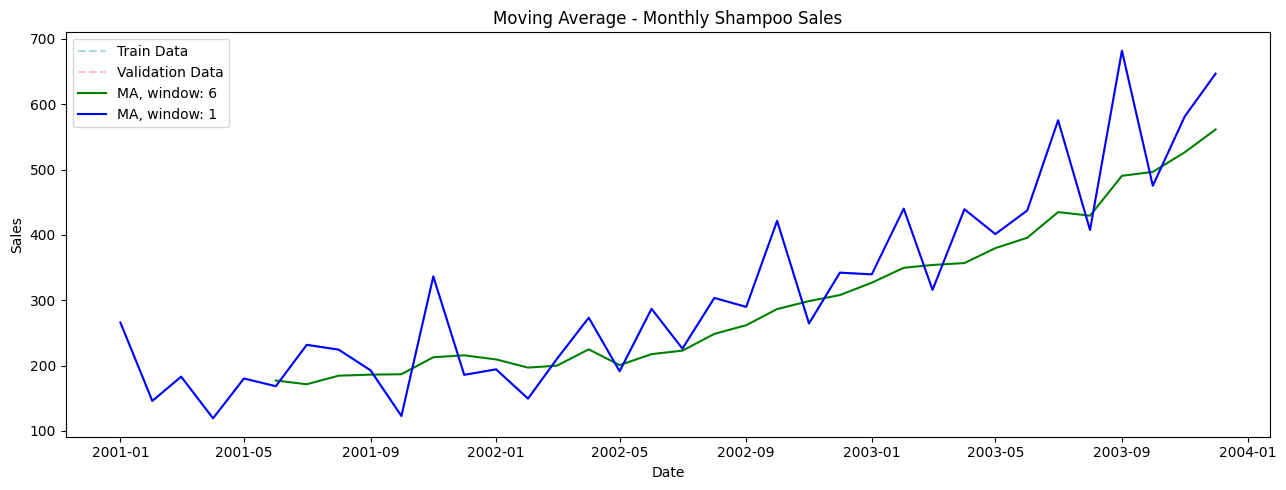

In [5]:
scripts.moving_average(shampoo_sales,test_shampoo_sales, train_shampoo_sales, value, title, 6)

In [6]:
# best period = 7
y_pred = test_shampoo_sales.rolling(window=6).mean()
scripts.print_error_metrics(y_pred[5:], test_shampoo_sales[5:], "MA - "+title)

Error Metrics - MA - Monthly Shampoo Sales
MAE  (Mean Absolute Error):      85.8972
MSE  (Mean Squared Error):       11275.1677
RMSE (Root Mean Squared Error):  106.1846
R²   (R-squared):                -0.2641


#### 3. Simple Exponential Smoothing

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


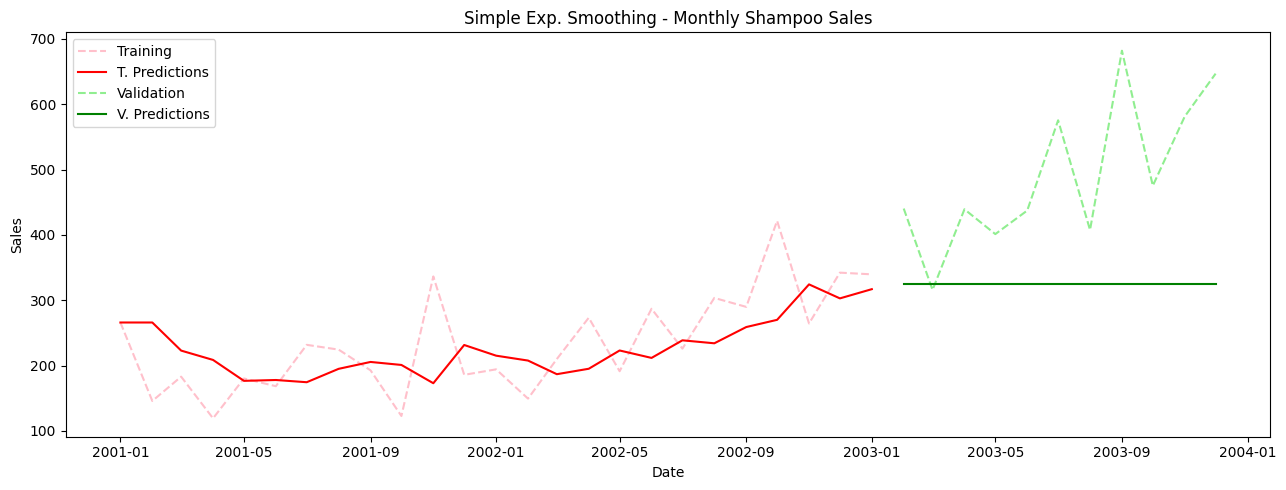

Error Metrics - SES - Monthly Shampoo Sales
MAE  (Mean Absolute Error):      167.7134
MSE  (Mean Squared Error):       39393.8943
RMSE (Root Mean Squared Error):  198.4790
R²   (R-squared):                -2.3309


In [7]:
scripts.ses_graph(train_shampoo_sales, test_shampoo_sales, value, title)

#### 4. Holt Winters
##### 4.1 Lineal

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


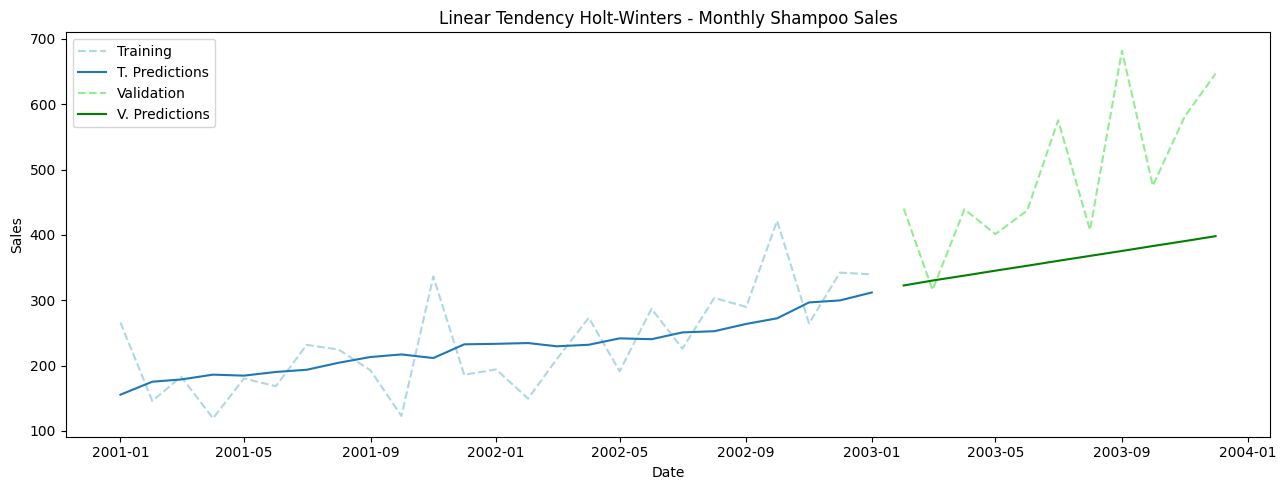

Error Metrics - Lineal HW - Monthly Shampoo Sales
MAE  (Mean Absolute Error):      133.3674
MSE  (Mean Squared Error):       25744.5413
RMSE (Root Mean Squared Error):  160.4511
R²   (R-squared):                -1.1768


In [8]:
scripts.lineal_hw(train_shampoo_sales, test_shampoo_sales, value, title)

##### 4.2 Seasonal

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


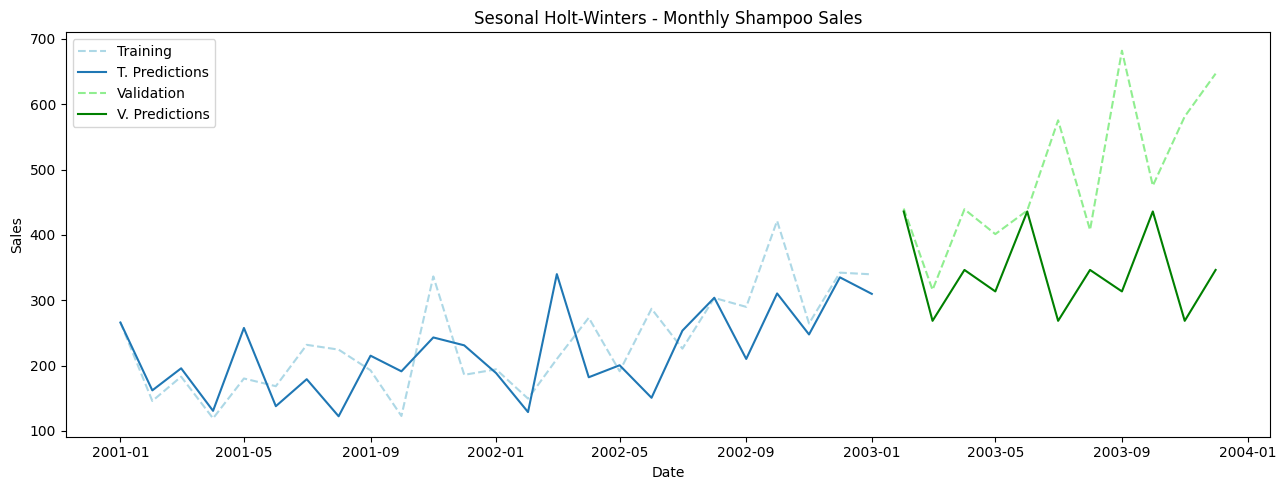

Error Metrics - Seasonal HW - Monthly Shampoo Sales
MAE  (Mean Absolute Error):      147.5413
MSE  (Mean Squared Error):       40175.5243
RMSE (Root Mean Squared Error):  200.4383
R²   (R-squared):                -2.3970


In [9]:
scripts.seasonal_hw(train_shampoo_sales, test_shampoo_sales, value, title, 4)

### 5. Modelo SARIMA 

In [2]:
%load_ext autoreload
%autoreload 2
shampoo_sales.index.name = "Date"  

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


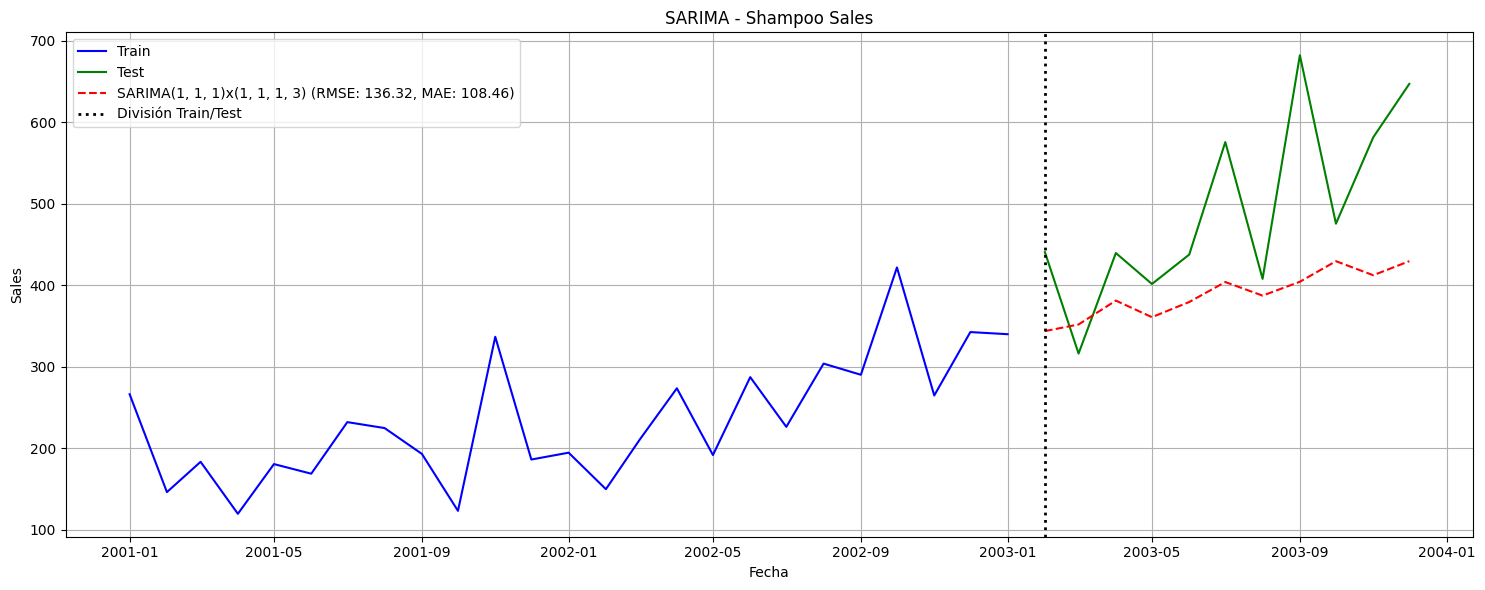

Modelo SARIMA (1, 1, 1)x(1, 1, 1, 3) - Shampoo Sales
Shampoo Sales - SARIMA RMSE: 136.32, MAE: 108.46


In [3]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(shampoo_sales.copy(), 'Date', 'Sales', order=(1,1,1), seasonal_order=(1,1,1,3), title="Shampoo Sales")

*Parámetros: (1,1,1)(1,1,1,3)*

- Usé m=3 ya que los datos son mensuales y parecen tener una estacionalidad trimestral.

### 6. Modelar serie de tiempo con Prophet

In [ ]:
# !pip install plotly
# !pip install prophet

17:26:43 - cmdstanpy - INFO - Chain [1] start processing
17:26:43 - cmdstanpy - INFO - Chain [1] done processing


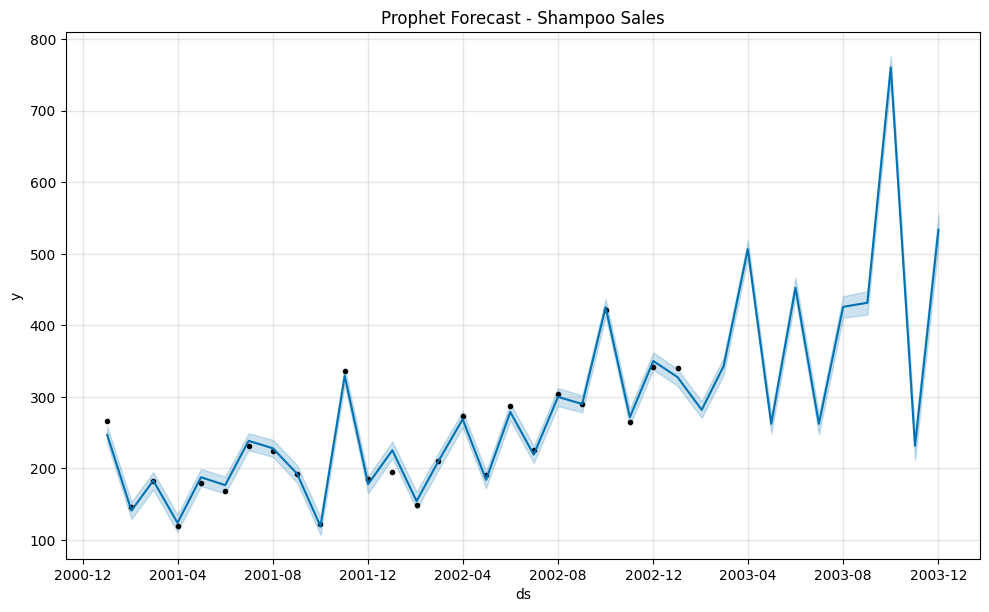

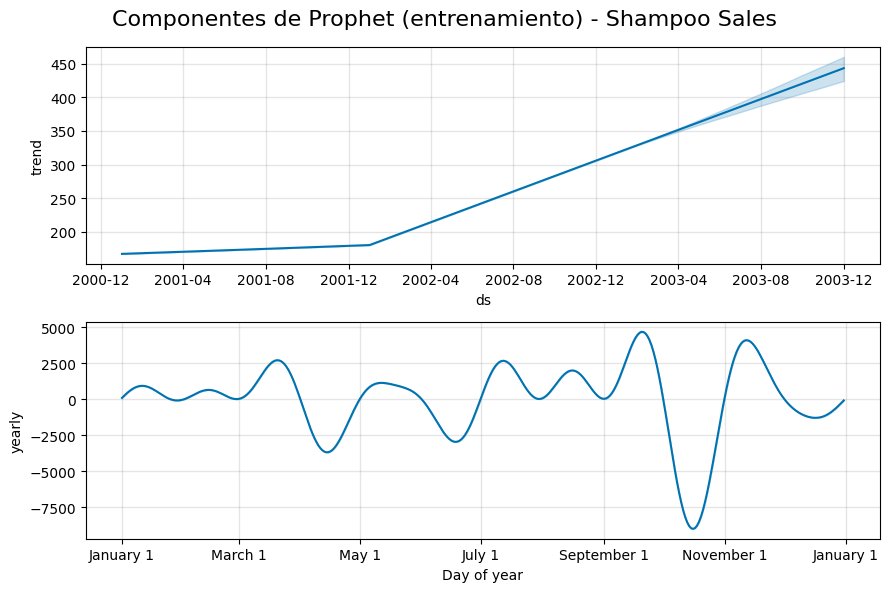

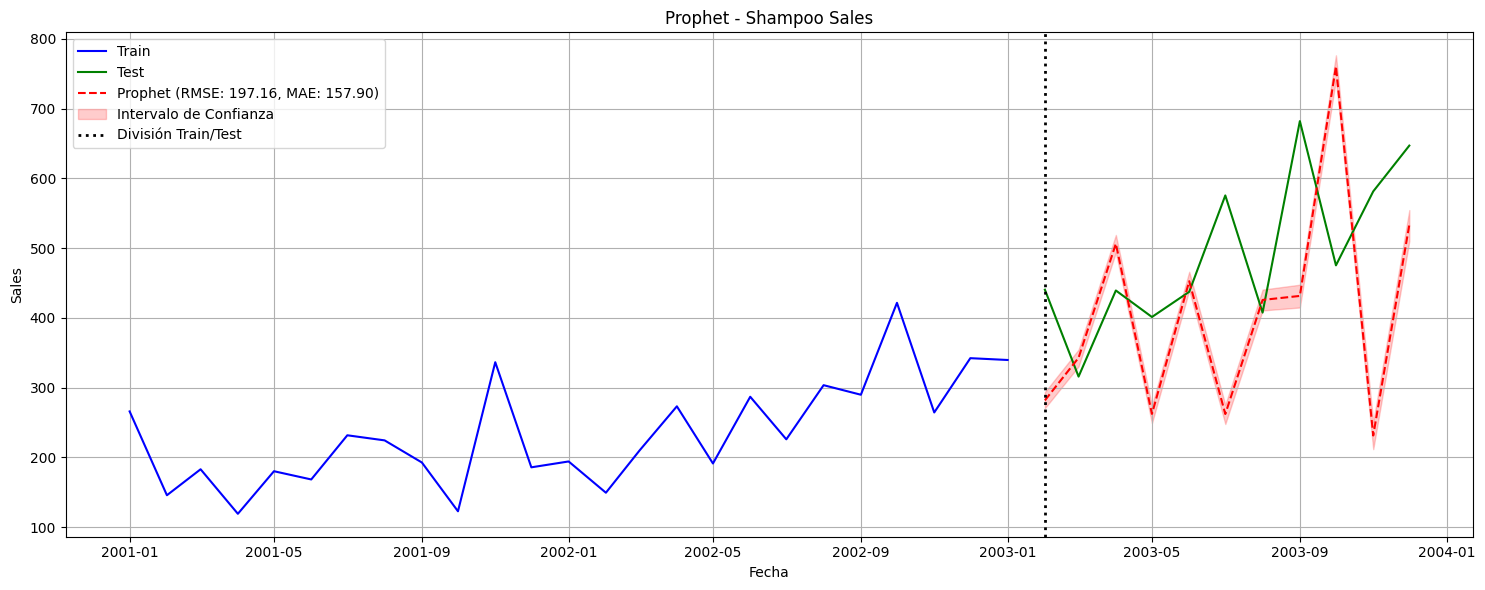

Shampoo Sales - Prophet RMSE: 197.16, MAE: 157.90


In [4]:
from scripts import apply_prophet
shampoo_sales.index.name = "Date"
# Aplicar Prophet
apply_prophet(shampoo_sales.copy(), 'Date', 'Sales', title="Shampoo Sales")

### Comparación de modelos 

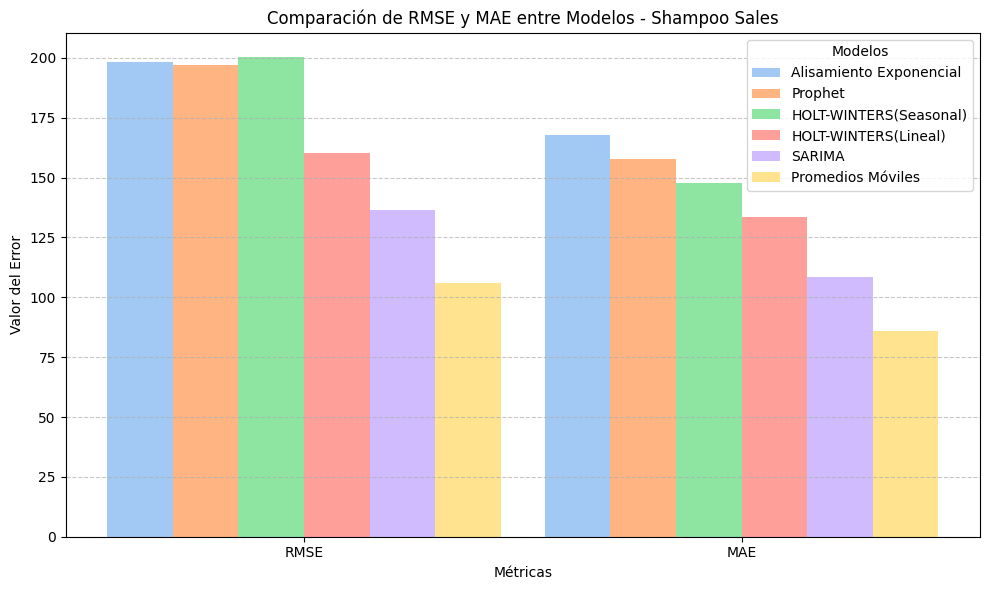

In [5]:
from scripts import plot_model_comparison
model_metrics = {
    "Promedios Móviles": {"RMSE": 106.18, "MAE": 85.90},
    "Alisamiento Exponencial": {"RMSE": 198.48, "MAE": 167.71},
    "HOLT-WINTERS(Lineal)": {"RMSE": 160.45, "MAE": 133.37},
    "HOLT-WINTERS(Seasonal)": {"RMSE": 200.44, "MAE": 147.54},
    "SARIMA": {"RMSE": 136.32, "MAE": 108.46},
    "Prophet": {"RMSE": 197.16, "MAE": 157.90}
}

plot_model_comparison(model_metrics, title="Comparación de RMSE y MAE entre Modelos - Shampoo Sales")